In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1215,2020-08-05,United Kingdom,306571.0,306293.0,46278.0,46299.0,278.0,-21.0
1216,2020-08-05,Germany,211822.0,212022.0,9169.0,9168.0,-200.0,1.0
1217,2020-08-05,Iran,315658.0,314786.0,17617.0,17617.0,872.0,0.0
1218,2020-08-05,Turkey,234770.0,234934.0,5764.0,5765.0,-164.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4224.21393442623
RMSE =  14702.337947487506


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  290.73196721311473
RMSE =  688.250946061172


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  24872.358974358973
RMSE =  44408.65198600015
-- World performances for deaths --
MAE =  1571.5811965811965
RMSE =  1914.3936019658713


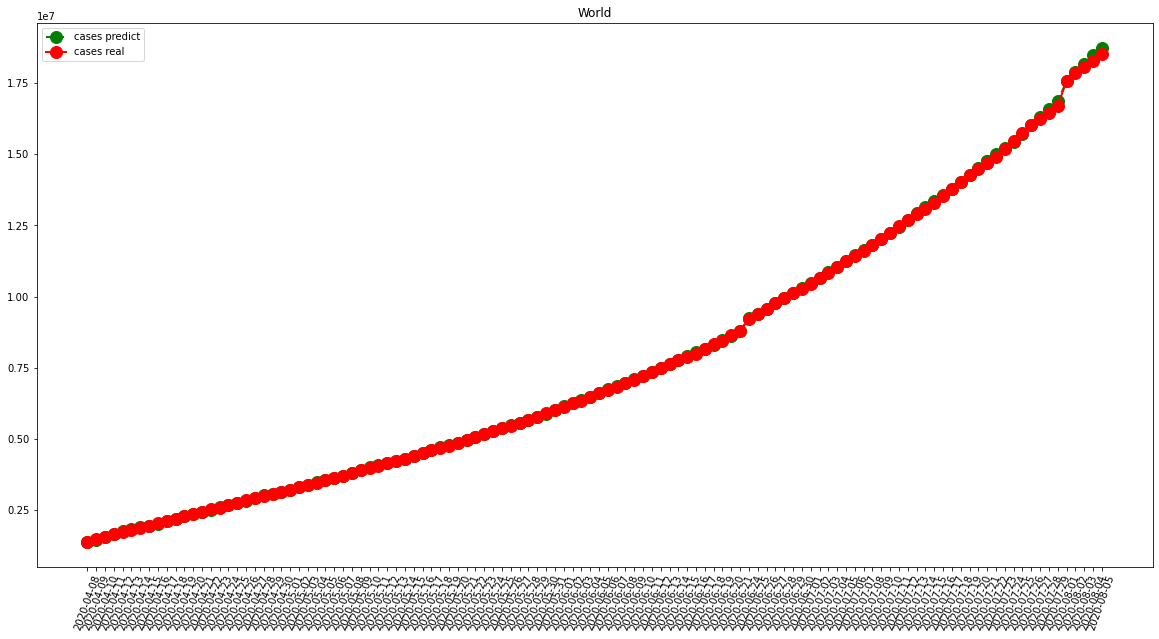

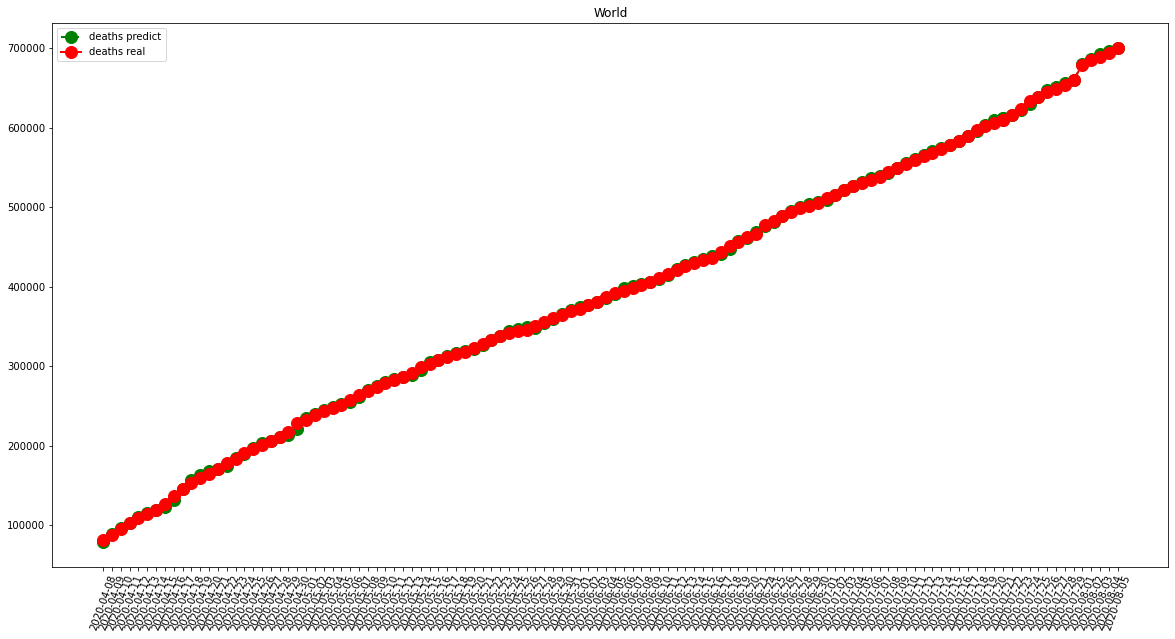

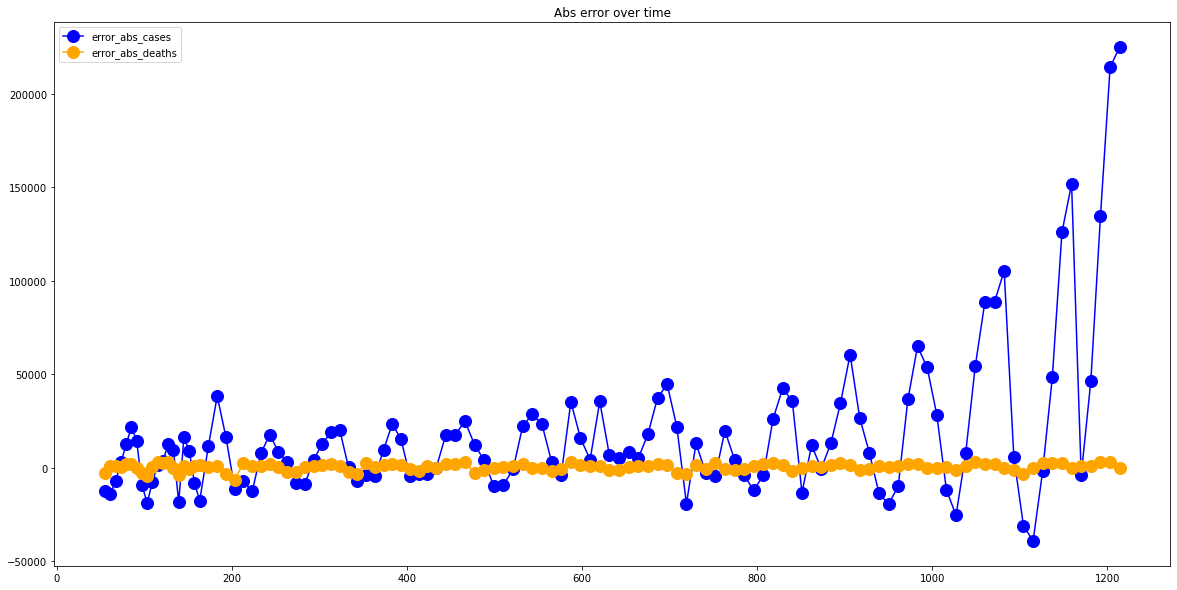

In [7]:
visShow("World")

-- France performances for cases --
MAE =  872.9133858267717
RMSE =  1384.9275429467775
-- France performances for deaths --
MAE =  142.90551181102362
RMSE =  297.4393473539281


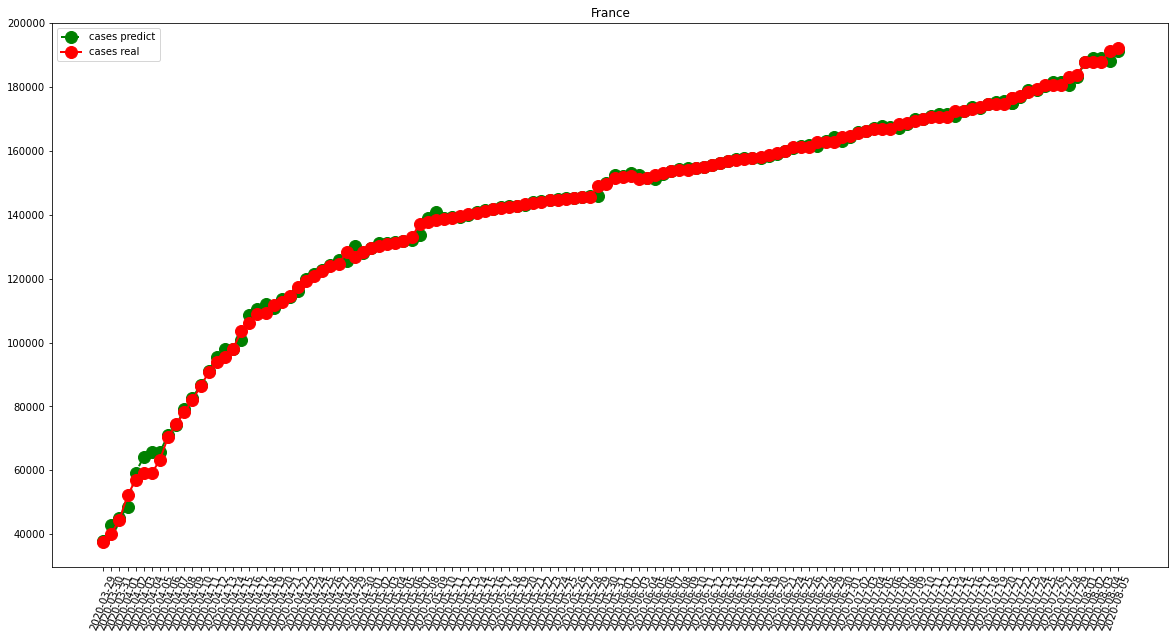

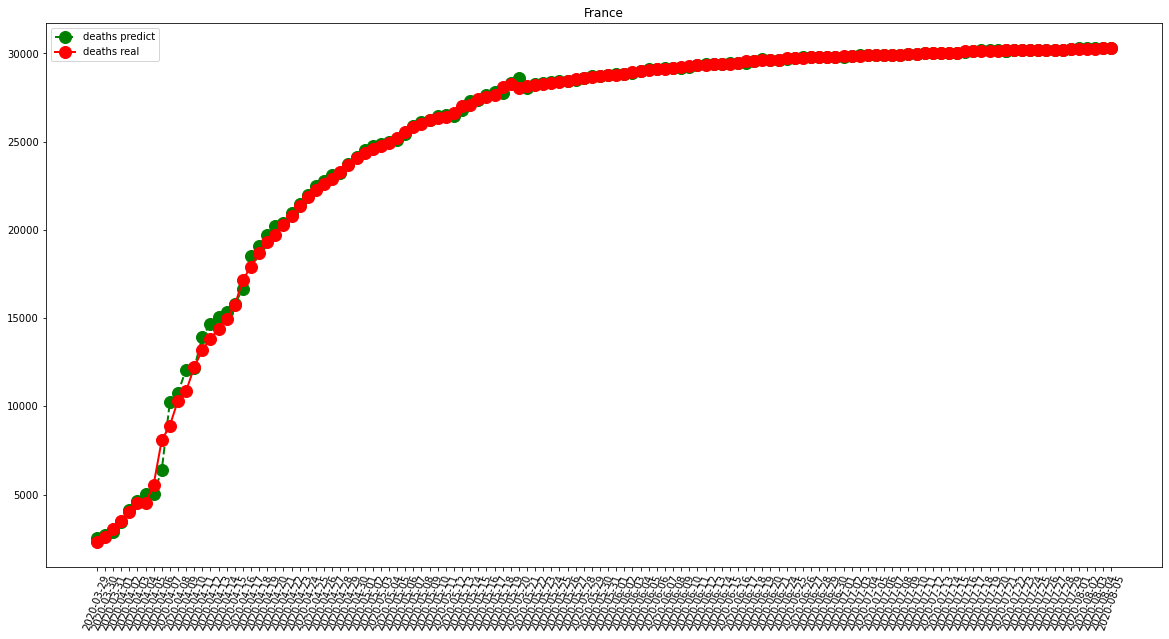

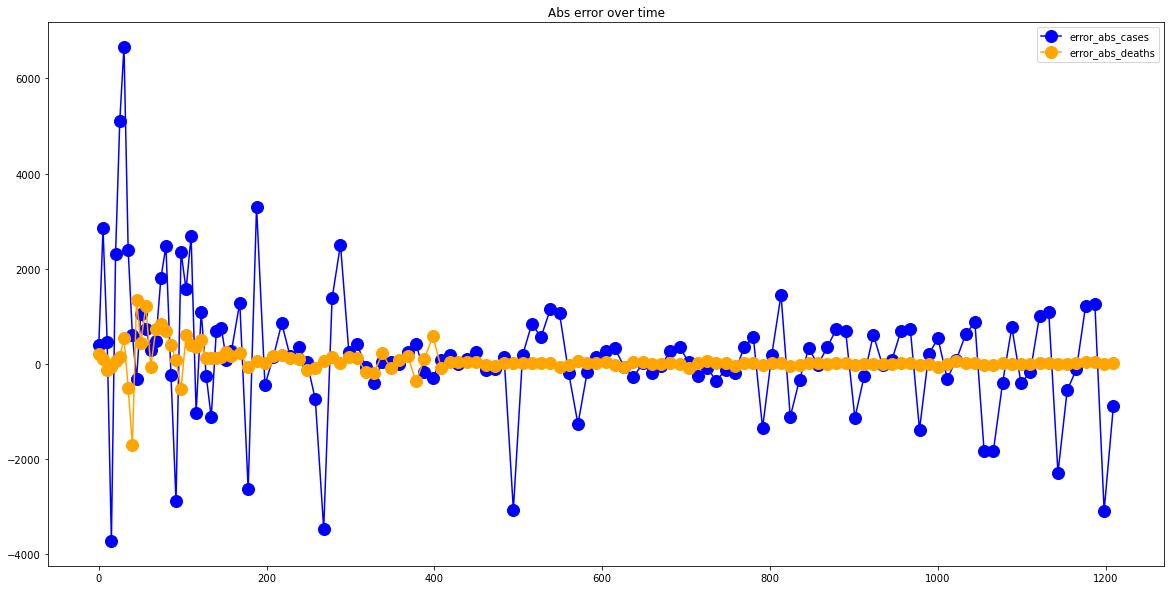

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  321.86614173228344
RMSE =  486.3634054950315
-- Italy performances for deaths --
MAE =  81.74803149606299
RMSE =  262.6562976756153


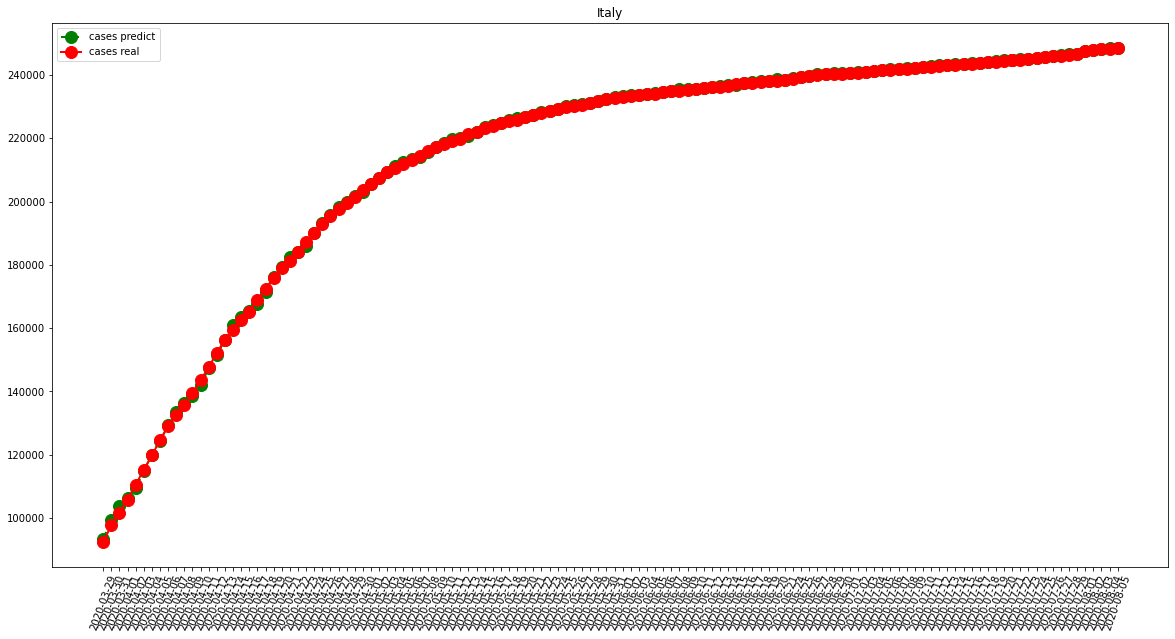

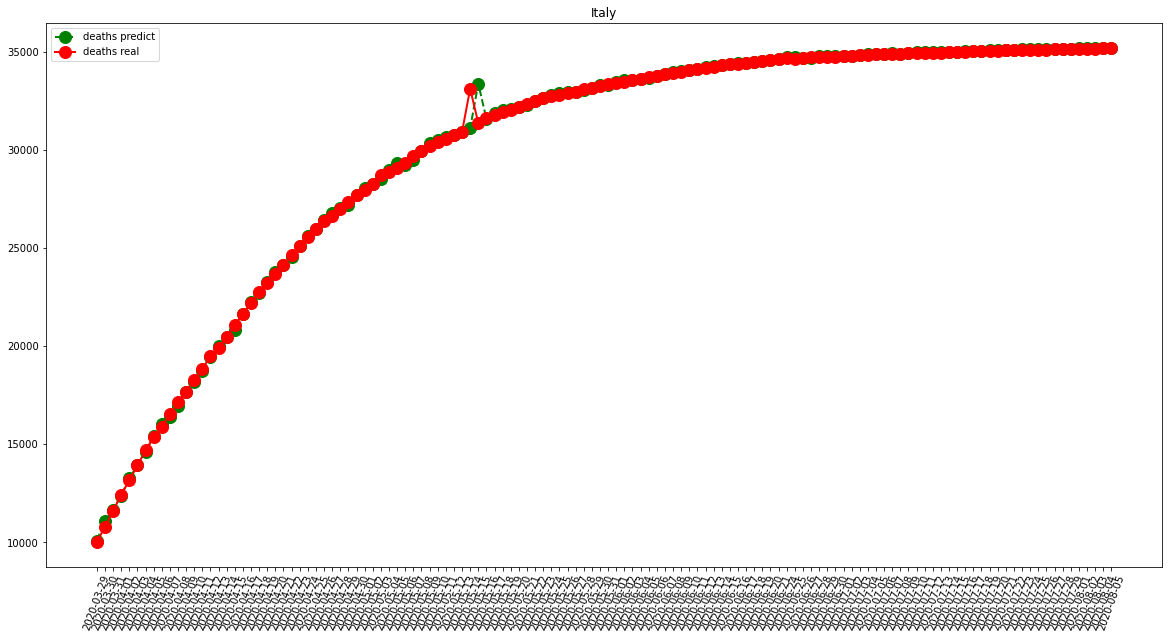

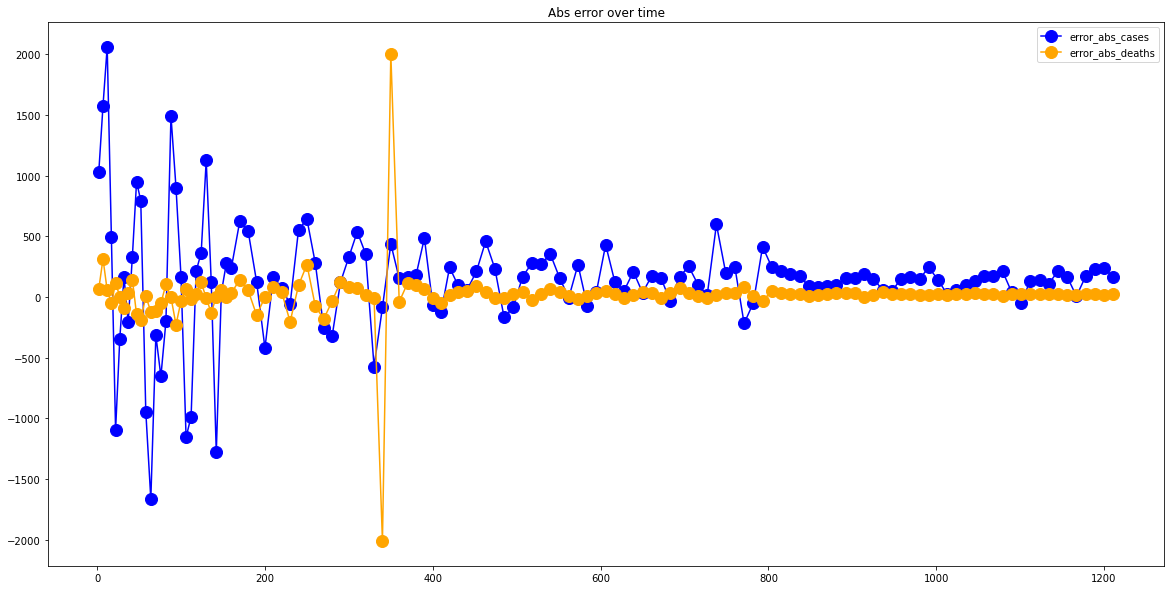

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1132.8267716535433
RMSE =  2266.263658205712
-- Spain performances for deaths --
MAE =  145.36220472440945
RMSE =  360.2061636271104


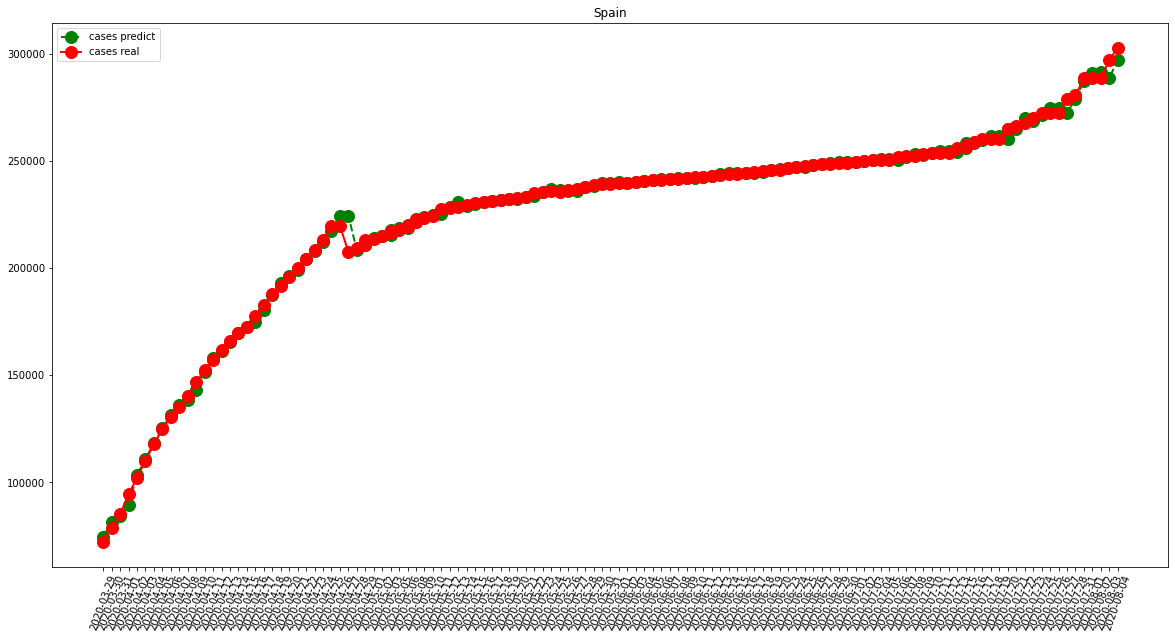

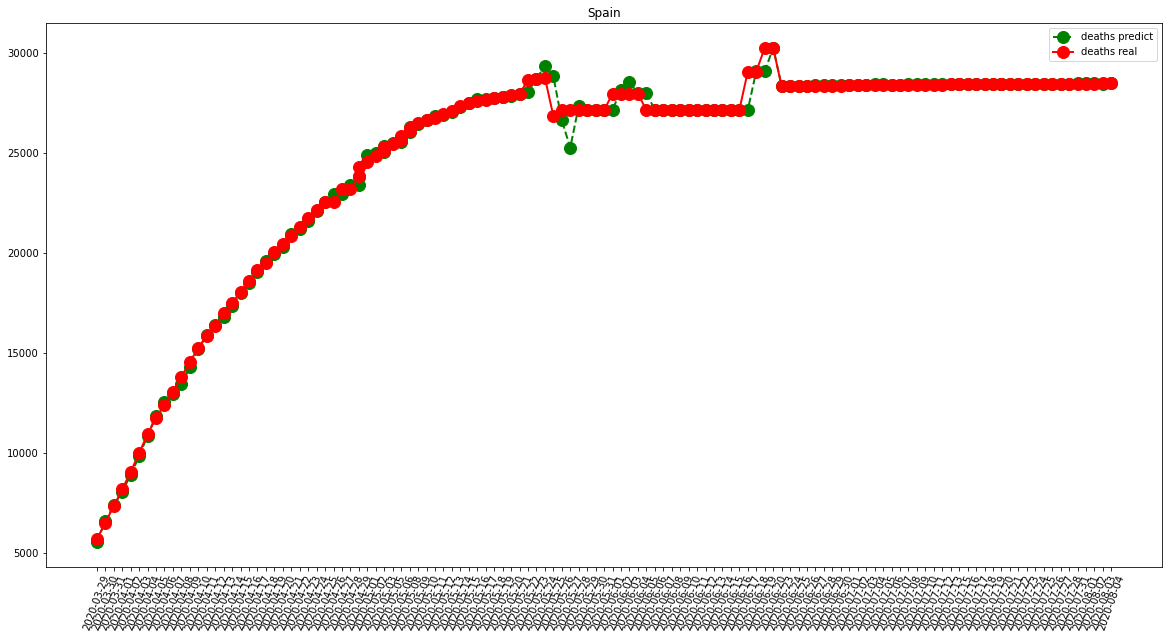

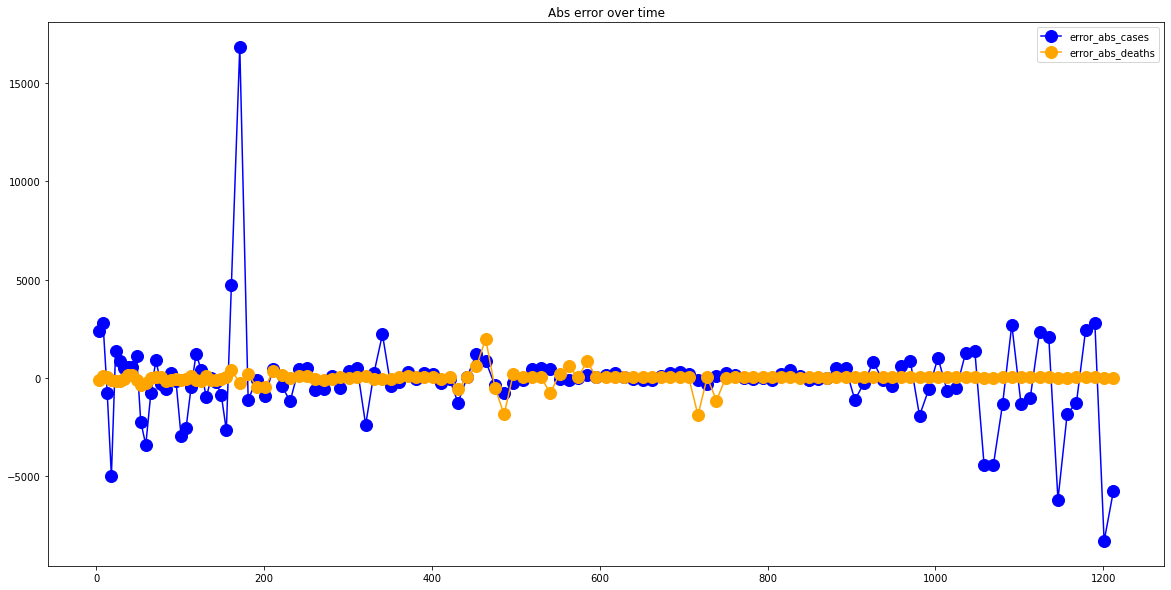

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  6560.488188976378
RMSE =  9455.274338637544
-- United States performances for deaths --
MAE =  503.20472440944883
RMSE =  724.0454971131053


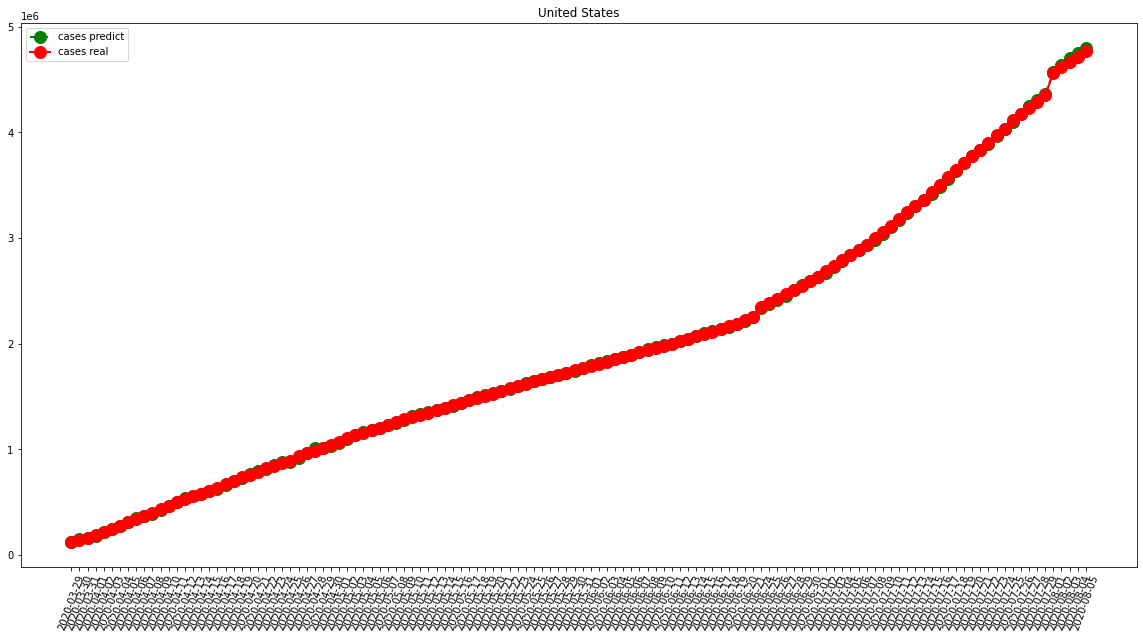

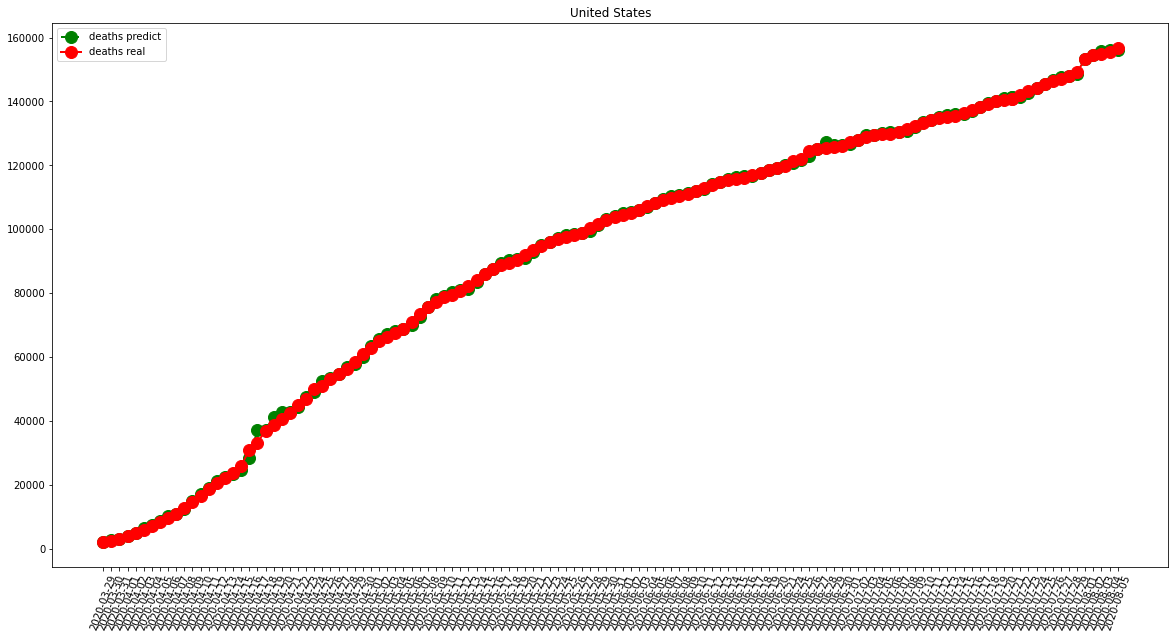

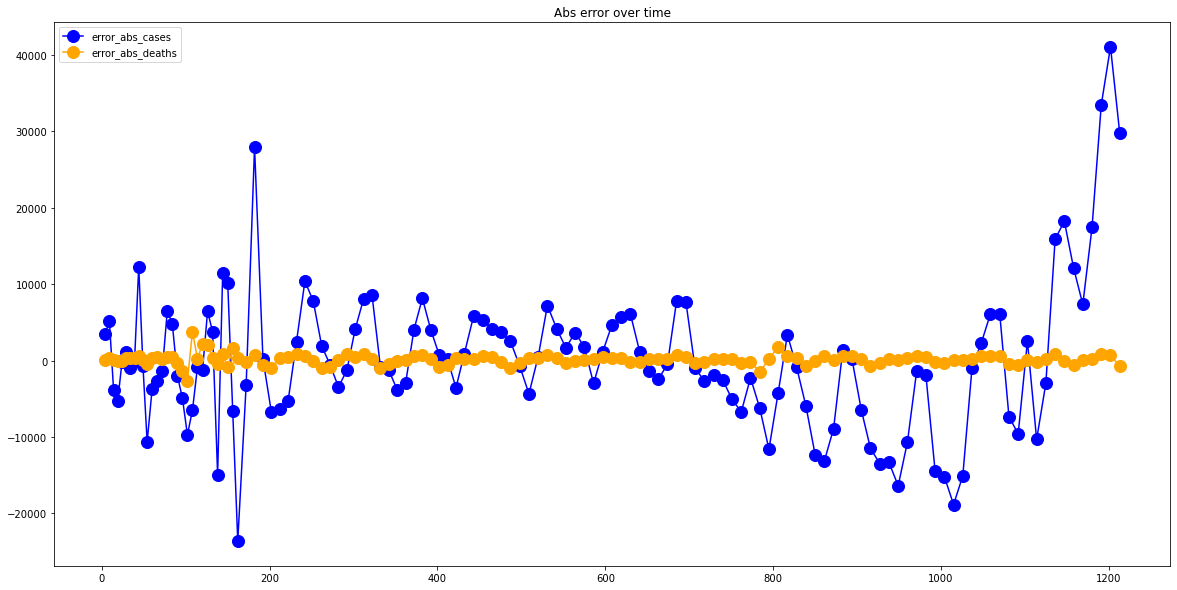

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  76.08661417322834
RMSE =  105.58628967308745
-- China performances for deaths --
MAE =  31.79527559055118
RMSE =  139.31401114312732


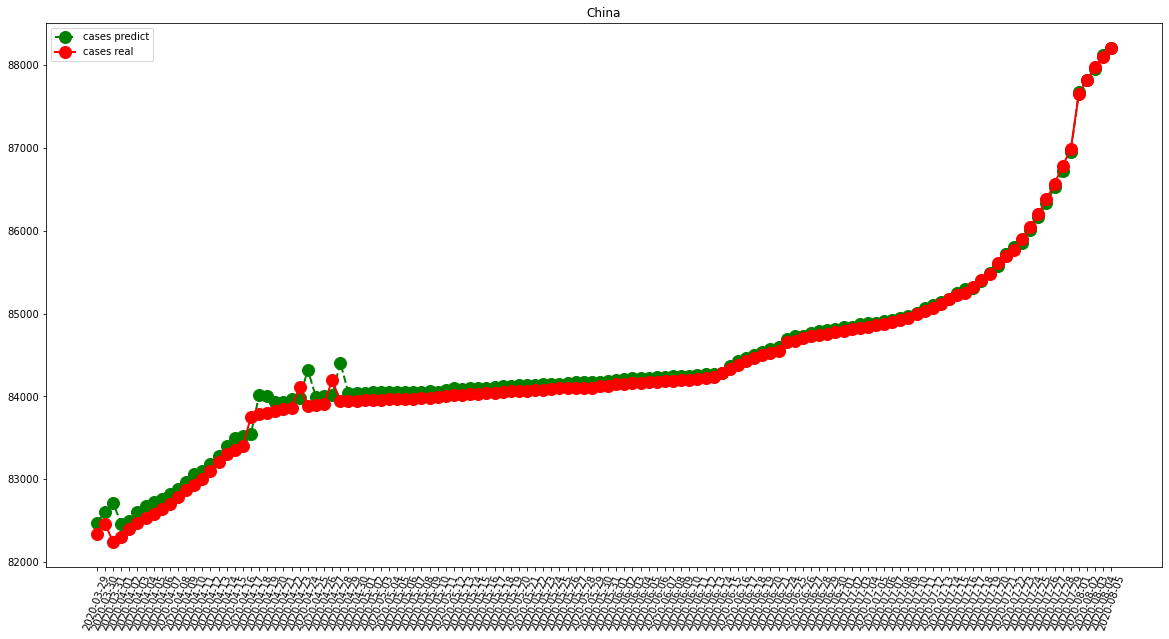

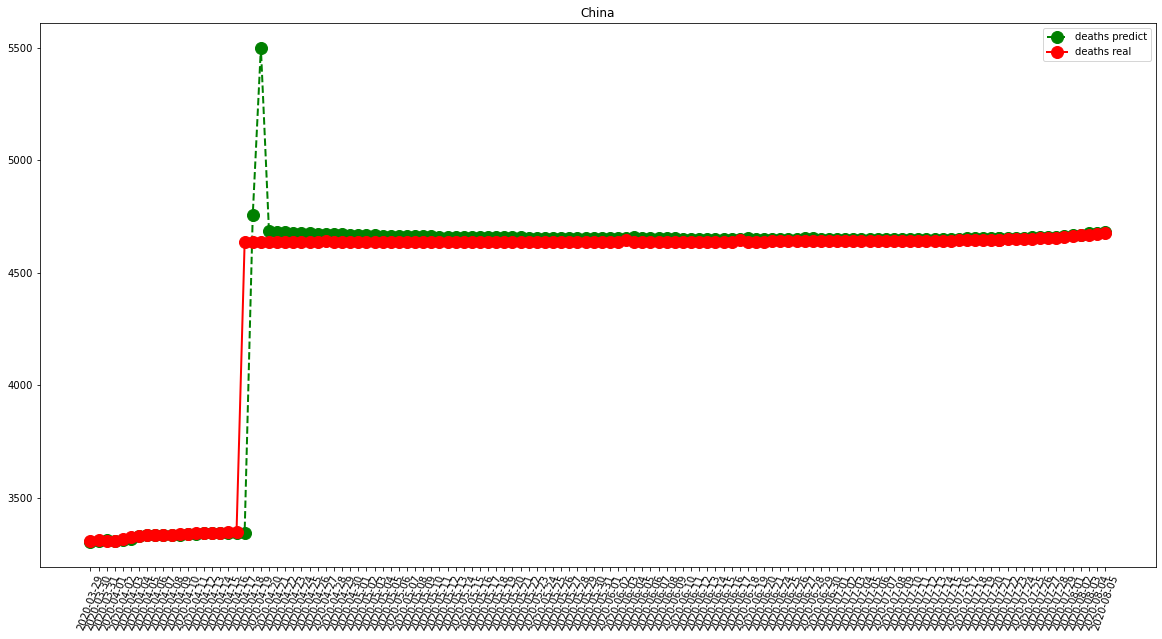

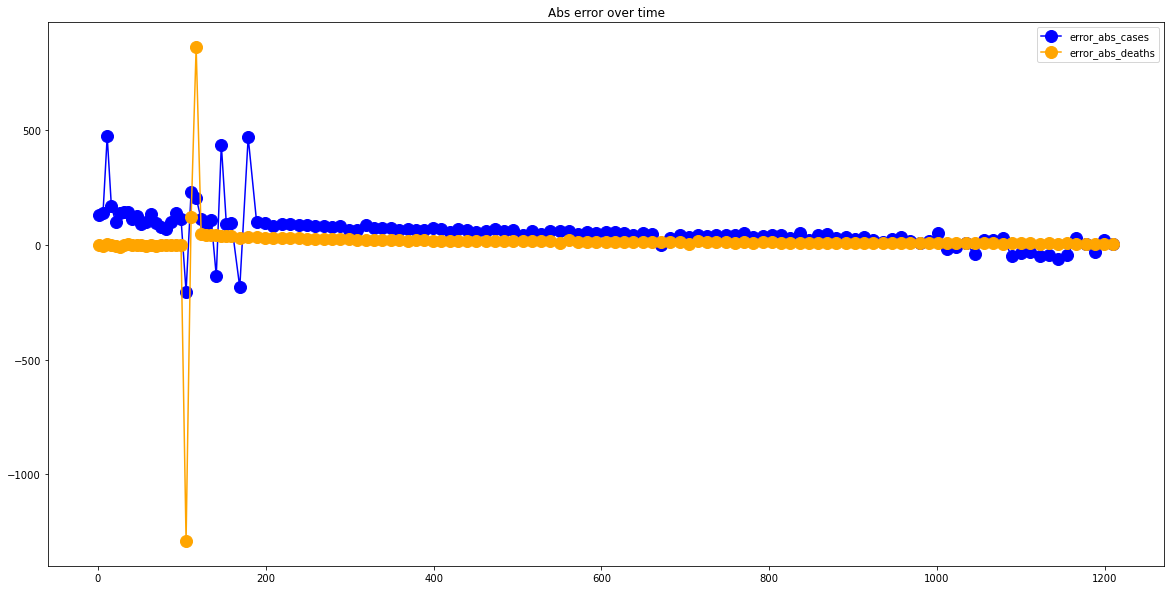

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1246.3939393939395
RMSE =  4194.907806501891
-- United Kingdom performances for deaths --
MAE =  196.22222222222223
RMSE =  493.58609413478445


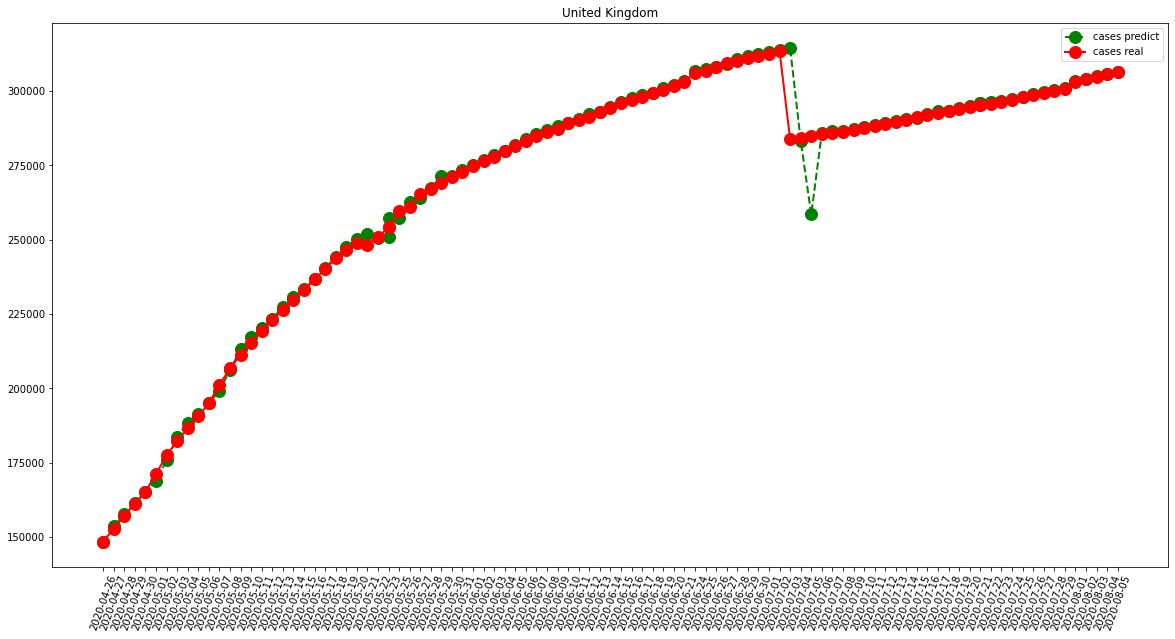

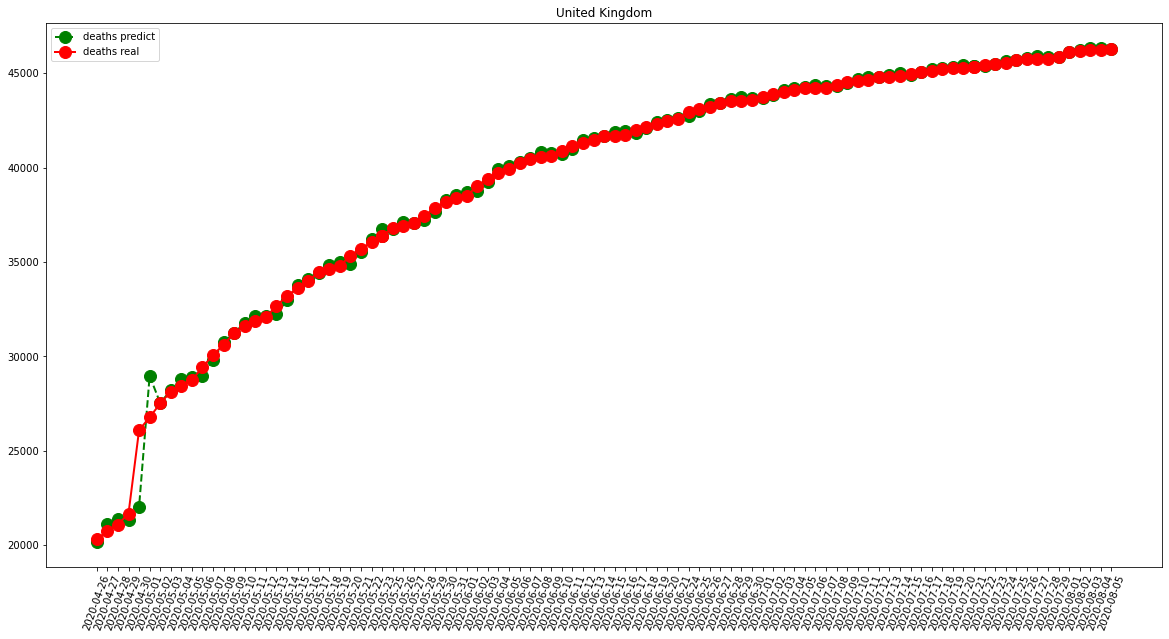

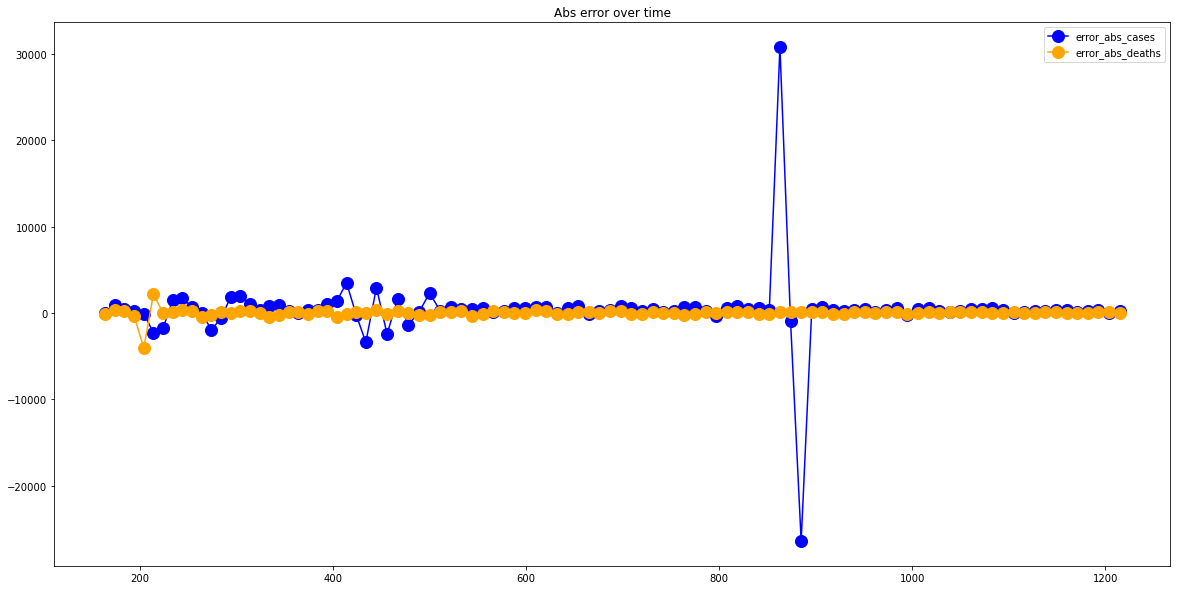

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  314.4040404040404
RMSE =  442.28200702422174
-- Germany performances for deaths --
MAE =  24.707070707070706
RMSE =  43.98852008183384


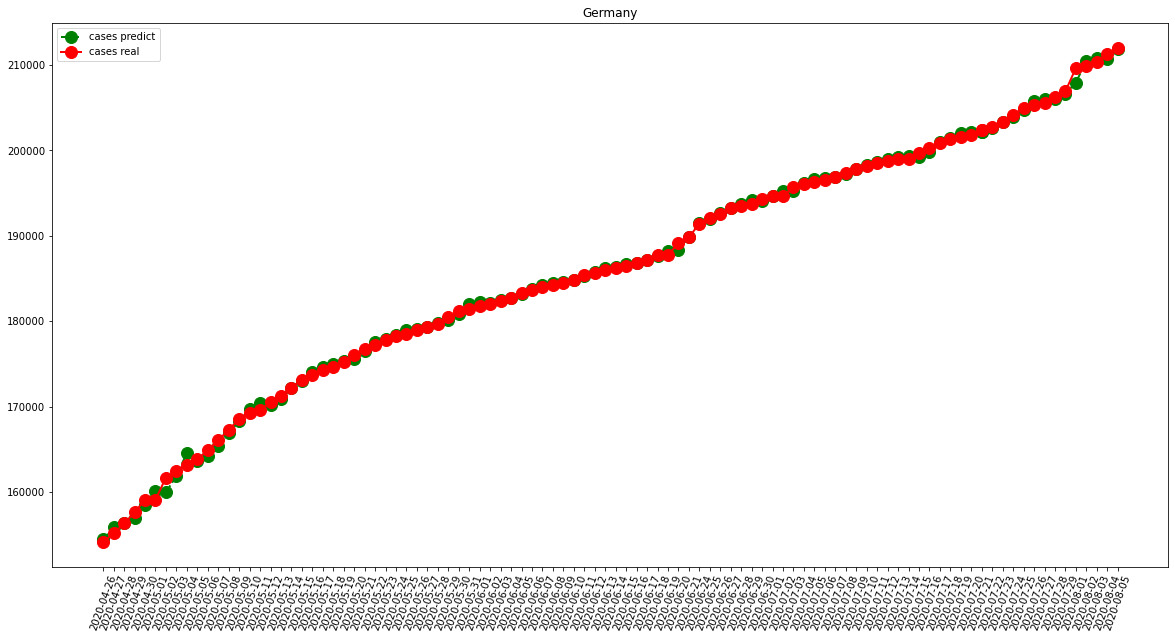

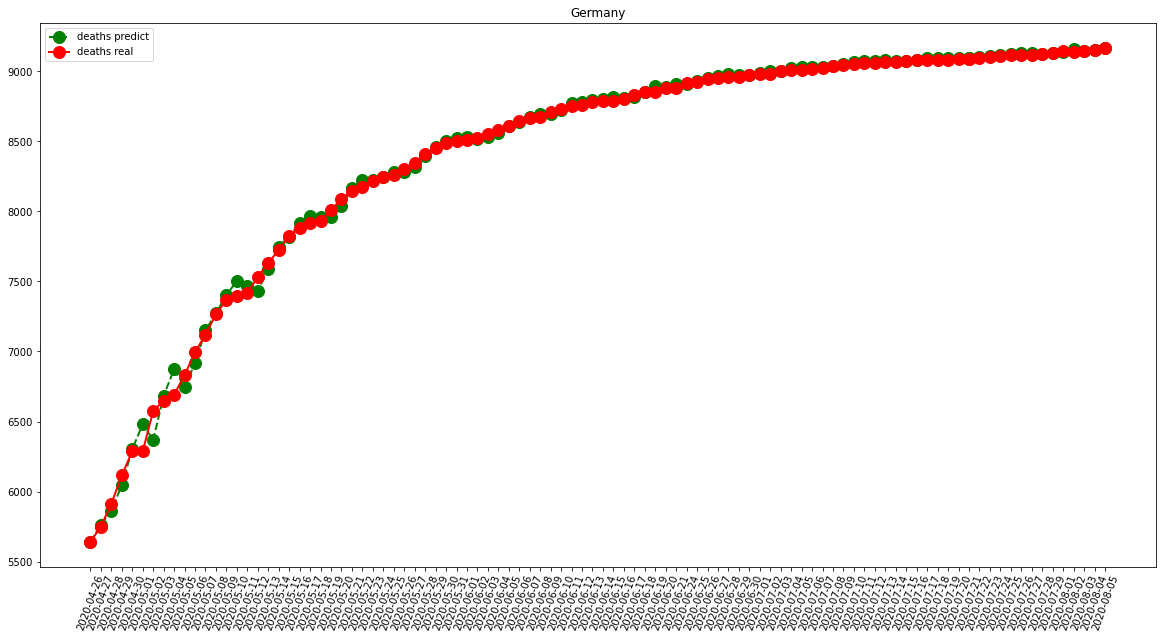

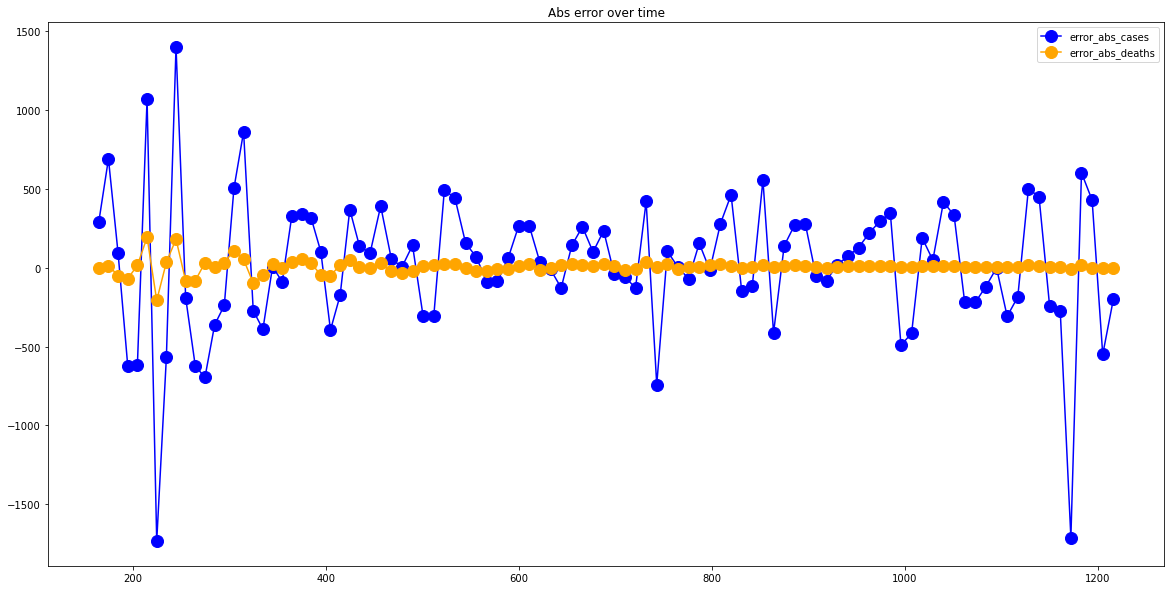

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  564.4343434343434
RMSE =  873.8233820574401
-- Iran performances for deaths --
MAE =  30.232323232323232
RMSE =  68.25228008919363


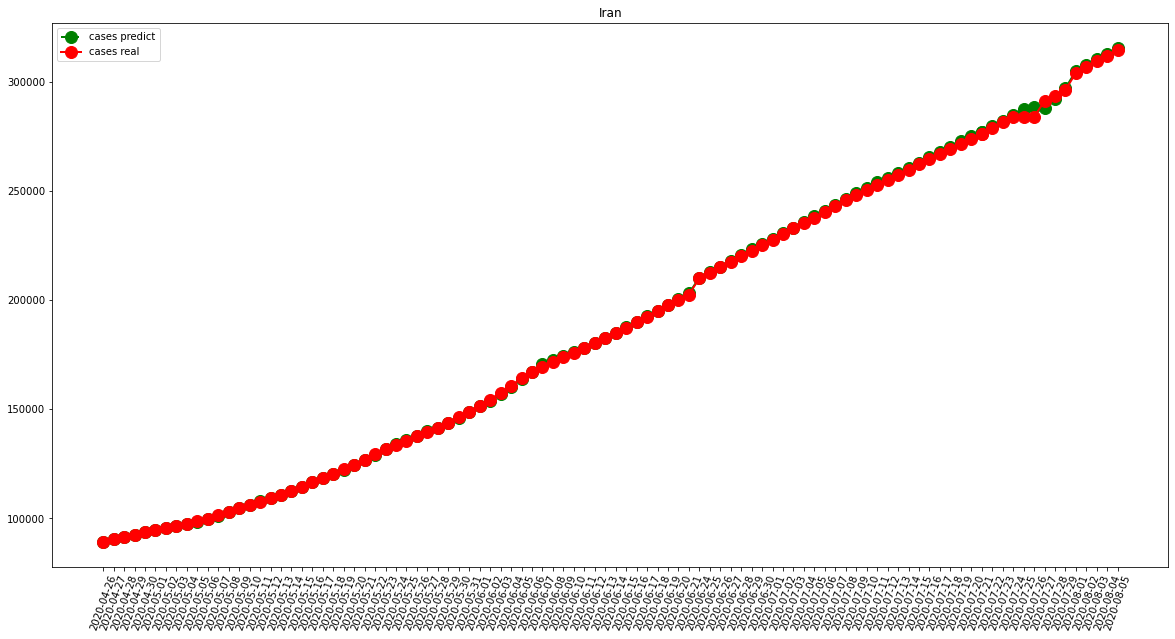

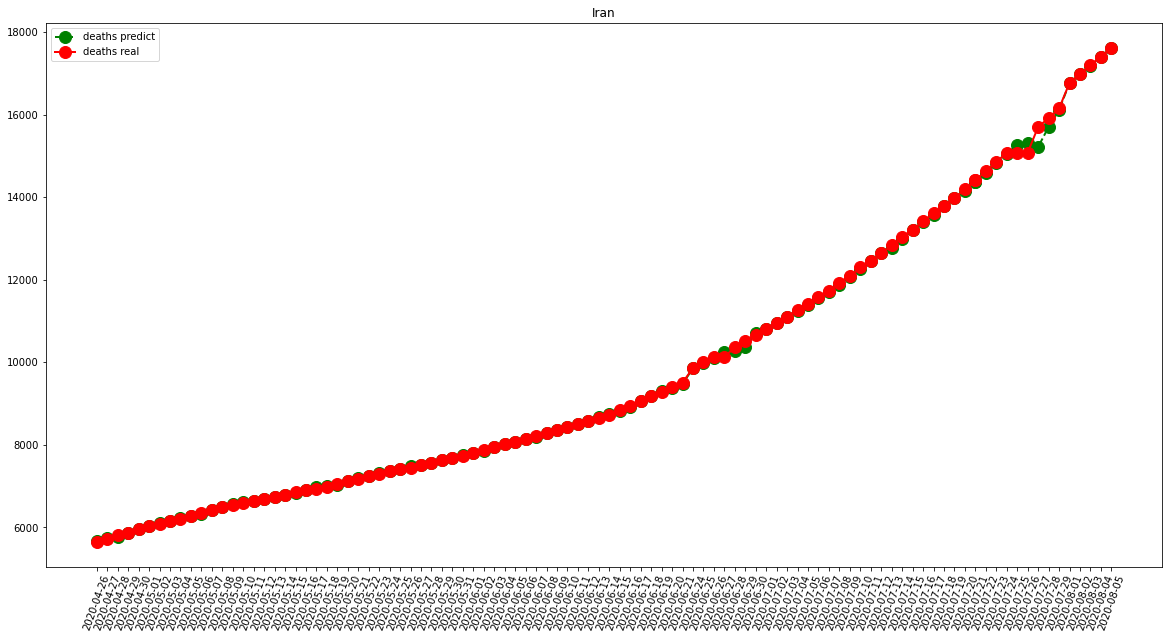

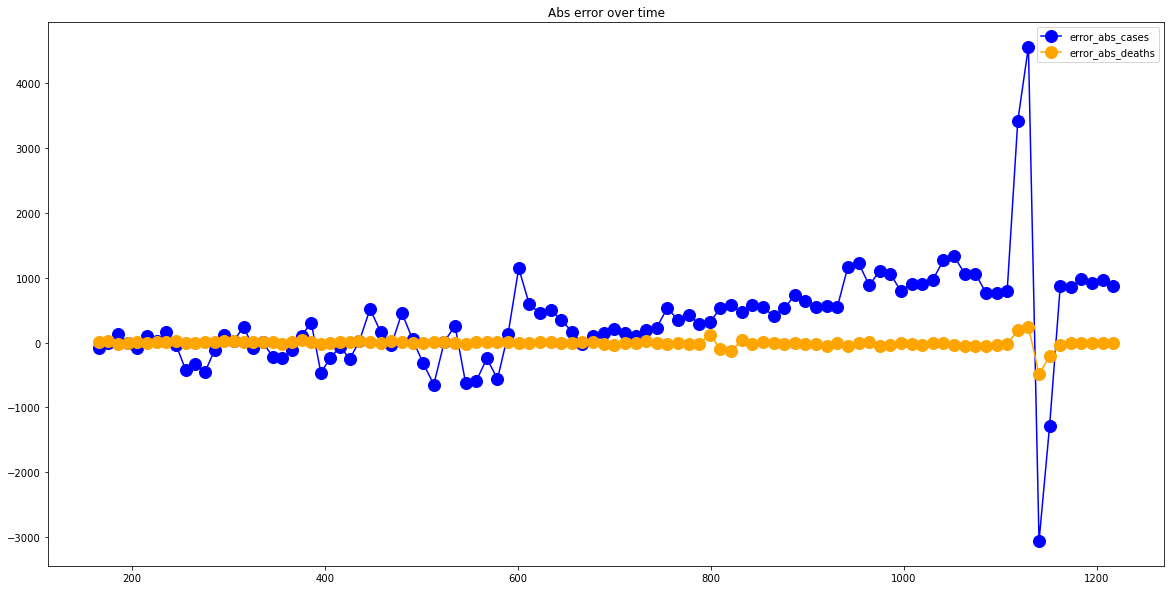

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  200.5151515151515
RMSE =  346.3150752033924
-- Turkey performances for deaths --
MAE =  19.141414141414142
RMSE =  102.02193267858999


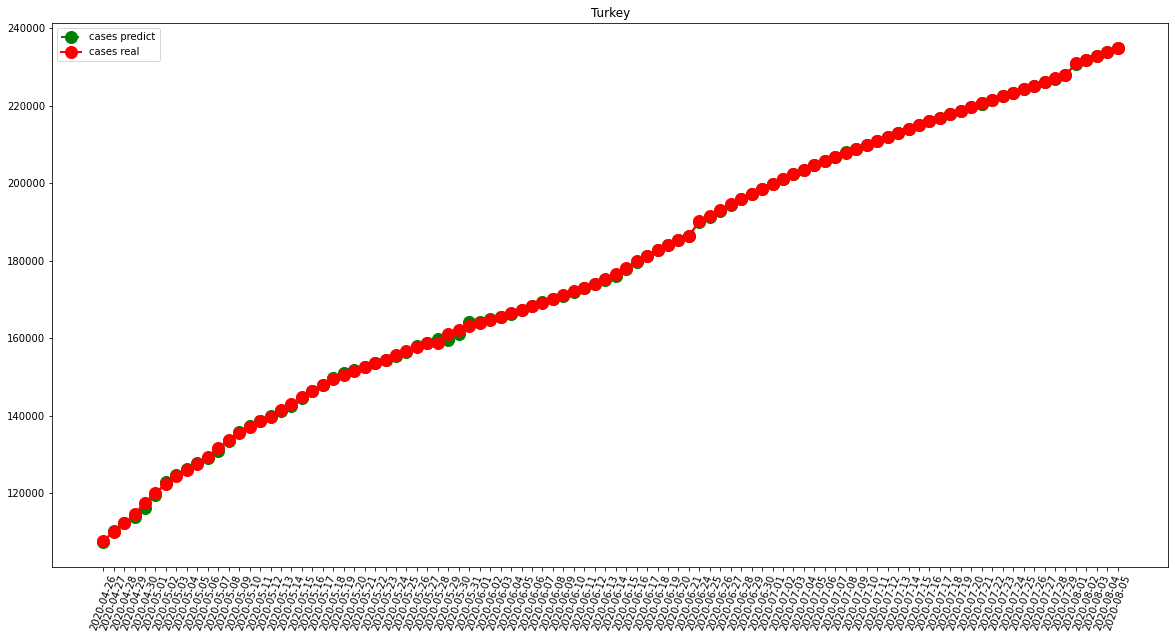

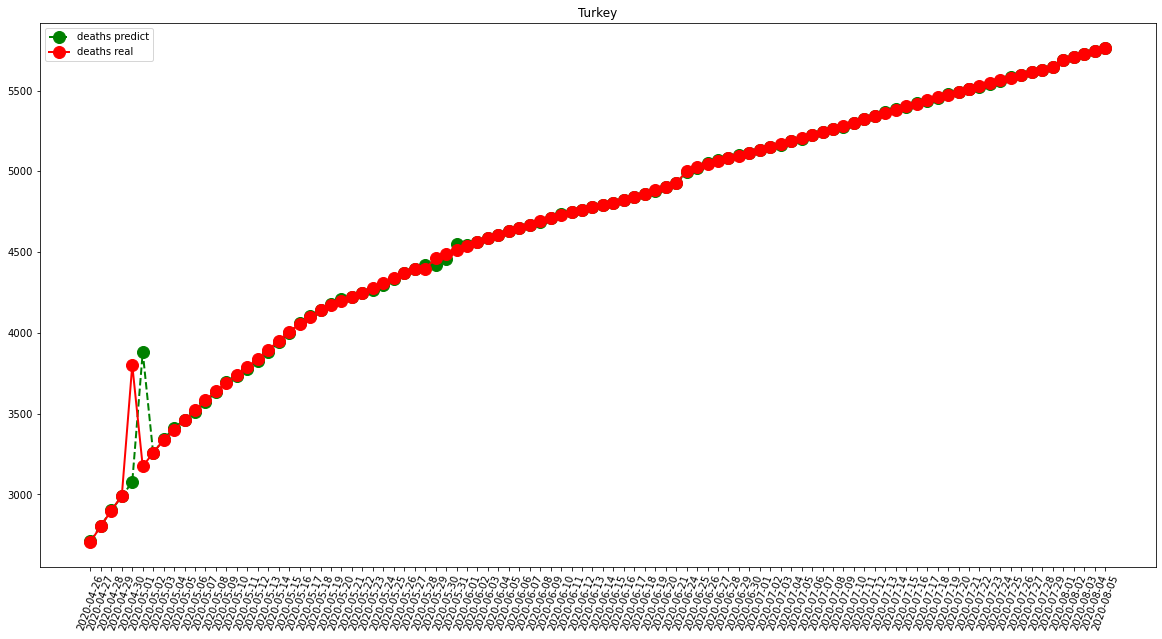

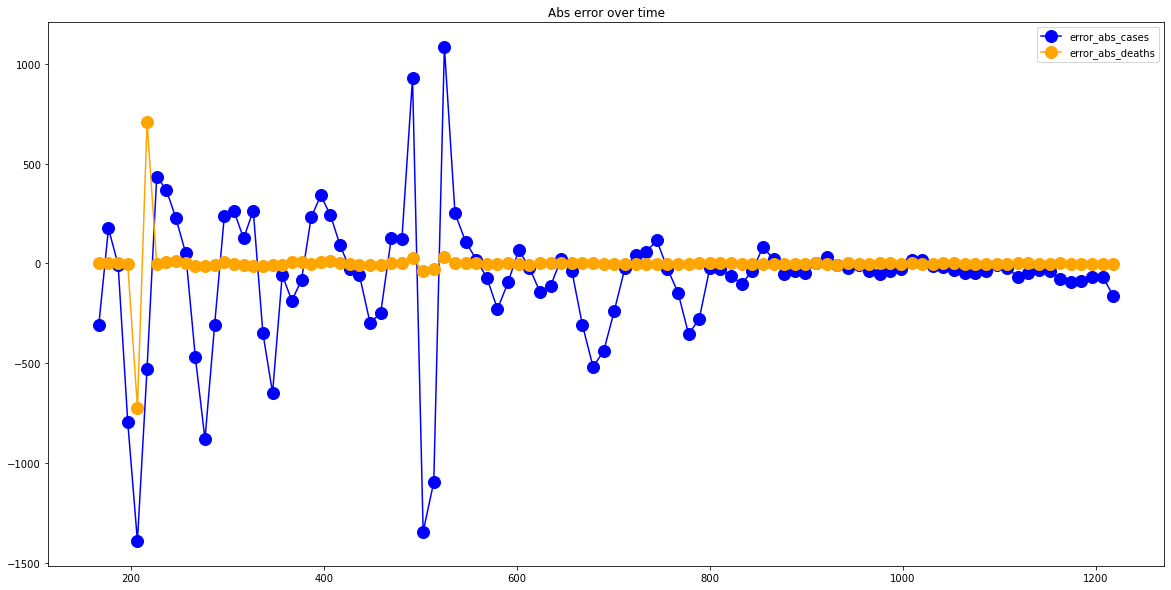

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12149.652777777777
RMSE =  16177.95609300576
-- Brazil performances for deaths --
MAE =  404.4583333333333
RMSE =  497.02225805289646


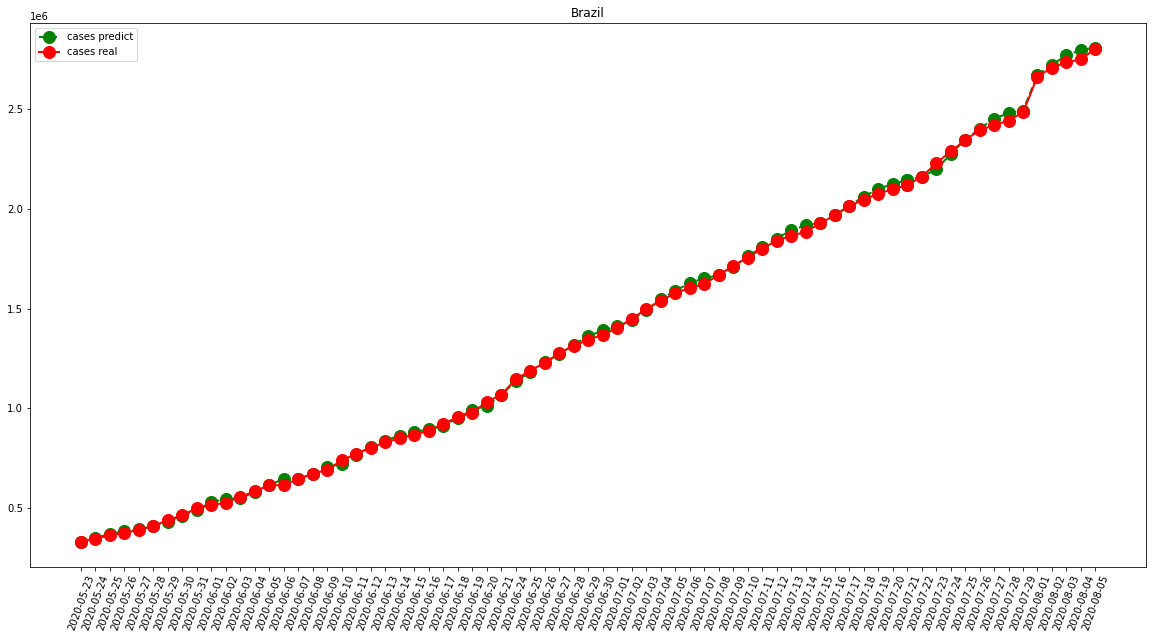

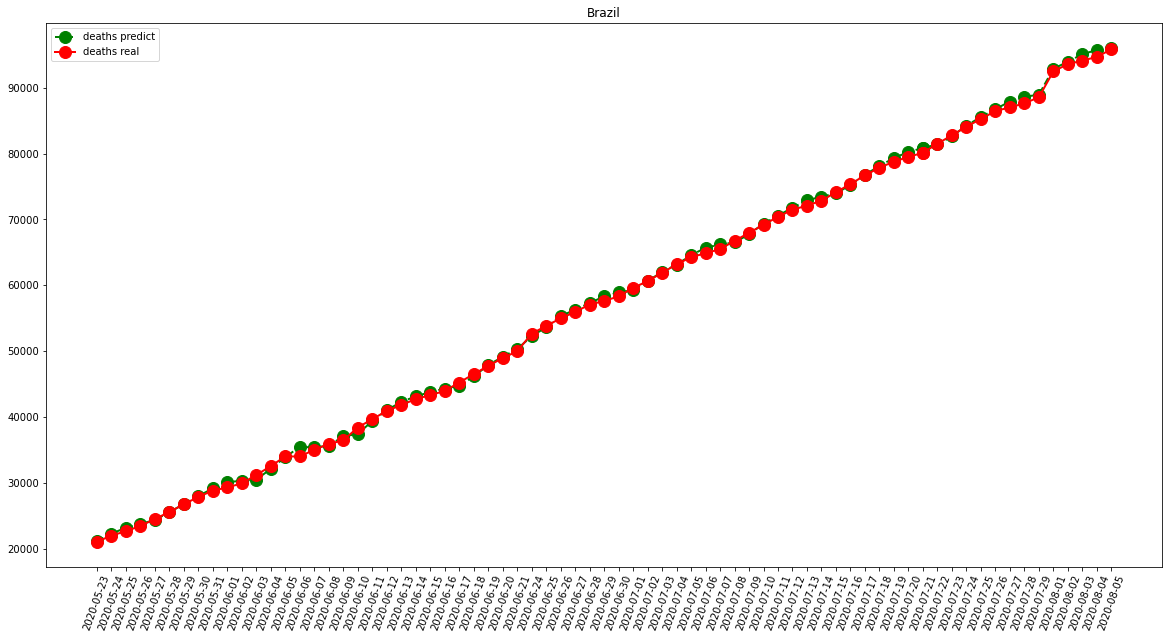

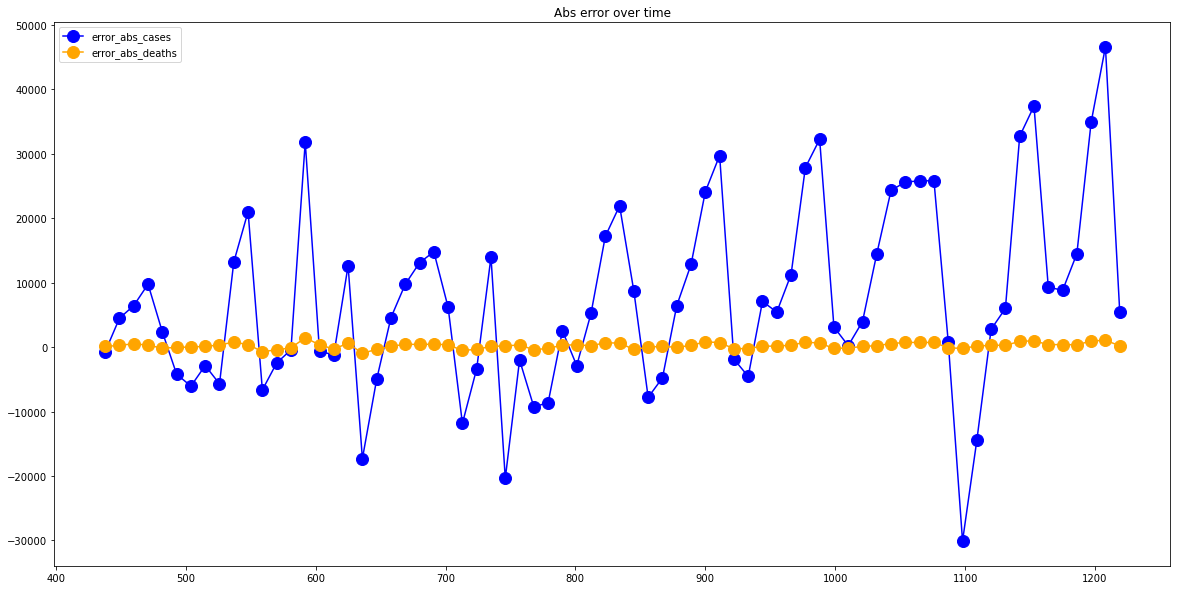

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)